# Chapter 3 Linear Regression

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
import statsmodels.api as sm
import numpy as np

## Exercise 8

8. This question involves the use of simple linear regression on the Auto
data set.
(a) Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and
the response?
iii. Is the relationship between the predictor and the response
positive or negative?

In [2]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [3]:
X=pd.DataFrame({'intercept':np.ones(Auto.shape[0]),'horsepower':Auto['horsepower']})
y=Auto['mpg']
model= sm.OLS(y,X)
results = model.fit()

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           7.03e-81
Time:                        17:59:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. ii. yes There is a relationship between the predictor and the response with medium intensity since there is an R-squared of 0.6.
iii. The realtionship is negative more horsepower implies less mpg.

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

In [5]:
new_X=pd.DataFrame({'intercept':[1],'horsepower':[98]})
results.predict(new_X)

0    24.467077
dtype: float64

In [6]:
prediction = results.get_prediction(new_X)
print(prediction.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

In [7]:
def abline(ax, b,m):
    xlim = ax.get_xlim()
    ylim= [m*xlim[0] + b, m*xlim[1] + b]
    ax.plot(xlim, ylim)

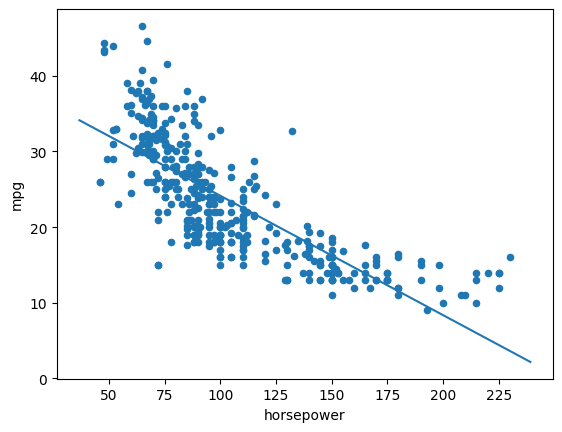

In [12]:
ax = Auto.plot.scatter(x='horsepower', y='mpg')
abline(ax, results.params['intercept'], results.params['horsepower'])

(c) Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

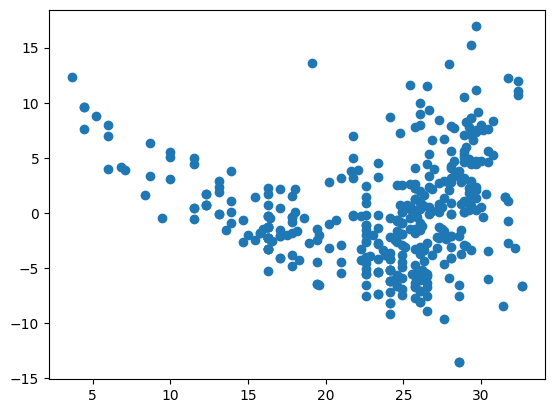

In [17]:
plt.scatter(results.fittedvalues, results.resid)
plt.show()

The residual plot is clearlt non symetrical with respect to x axis, is clear that there are better models that can fit in this situation, a logaritmic scale for example.